# Introduction to openPMD-viewer LPA diagnostic tools

openPMD-viewer comes with a class containing methods for analysis of PIC simulations of laser wakefield acceleration.

This notebook will show the usage of the given methods

## (optional) Preparing this notebook to run it locally

If you choose to run this notebook on your local machine, you will need to download the openPMD data files which will then be analysed. To do so, execute the following cell.

In [2]:
import os, sys, tarfile, wget

def download_if_absent( dataset_name ):
    "Function that downloads and decompress a chosen dataset"
    if os.path.exists( dataset_name ) is False:
        tar_name = "%s.tar.gz" %dataset_name
        url = "https://github.com/openPMD/openPMD-example-datasets/raw/draft/%s" %tar_name
        wget.download(url, tar_name)
        with tarfile.open( tar_name ) as tar_file:
            tar_file.extractall()
        os.remove( tar_name )

download_if_absent( 'example-2d' )
download_if_absent( 'example-3d' )
download_if_absent( 'example-thetaMode' )

In addition, we choose here to incorporate the plots inside the notebook.

In [3]:
%matplotlib inline

## The LpaDiagnostics class

To use the LPA diagnostic tools:
- Load the class `LpaDiagnostics` from the module `opmd_viewer.addons.pic.lpa_diagnostics`

In [4]:
from opmd_viewer.addons.pic.lpa_diagnostics import LpaDiagnostics

- A LpaDiagnostics instance is created in the same way as an OpenPMDTimeSeries
- It inherits from OpenPMDTimeSeries so all GUI (e.g 'sliders') methods can still be called

In [5]:
ts_2d = LpaDiagnostics('./example-2d/hdf5/')

In [18]:
ts_2d.slider()

This will call an interactive panel as known from the main opmd_viewer module
![GUI_representation](./img/GUI_image_2d.png)

## Diagnostic methods
The diagnostic methods are currently only implemented for API-like usage which means, that either the time or iterartion has to be specified when calling a method, by setting the `t` or `iteration` parameter. 

### Particle diagnostics
For methods involving particle data additionally the desired particle species hast to specified with the `species` parameter. Optionally the data can be filtered by any desired particle quantity. This is done with the `select` parameter:

e.g  `select={'uz' : [uz_min, uz_max]}`

In the following the available particle diagnostic methods will be explained.

For more information a method's documentation can be called with:

In [13]:
ts_2d.get_mean_gamma?

#### Mean gamma
To calculate the mean energy and its standard deviation of selected particles `get_mean_gamma` can be used.

In [19]:
ts_2d.get_mean_gamma(iteration=200, species='electrons', select={'uz' : [0.05, None]})

(1.0728789218796735, 0.097236466556532342)

#### Charge
`get_charge` calculates the charge of the given particle selection in Coulomb.

In [20]:
ts_2d.get_charge(iteration=200, species='electrons')

-0.0011638912523804891

#### Divergence
This method calculates the divergence of the selected particles as $\langle \arctan{u_{x/y}/u_z} \rangle$

In [6]:
ts_2d.get_divergence(iteration=200, species='electrons')

(1.5566555397130202, 1.6577475557234522)

#### Emittance
This method can be used to calculate the normalized emittance in the x and y plane for selected particles by evaluating
$$\epsilon_{n,rms}=\sqrt{\langle x^2 \rangle \langle u_x^2 \rangle - \langle x u_x \rangle^2}$$

In [7]:
ts_2d.get_emittance(iteration=200, species='electrons')

(1.864736547831283e-07, 2.331999989404688e-09)

#### Current
`get_current` can be used to calculate the instantaneous current along the z_axis generated by the selected particles. When setting `plot=True` the resulting current profile is directly plotted. Otherwise an array with the data is returned.

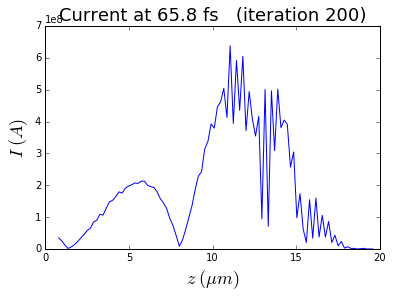

In [12]:
ts_2d.get_current(iteration=200, species='electrons', plot=True);

### Laser diagnostic
The laser diagnostic methods require the user to specify the plane of laser polarisation by setting the argument `pol=` to either `'x'` or `'y'`

#### Laser envelope
This method helps to calculate the envolope of a given laser field. This can be done for a 1D slice of the field or for an entire 2D plane. The resulting data is returned in form of a 1D or 2D array, respectively.

In [19]:
ts_2d.get_laser_envelope(iteration=200, pol='y');

#### Spectrum
This function helps to easily calculate (and plot) the spectrum of a given laser field.

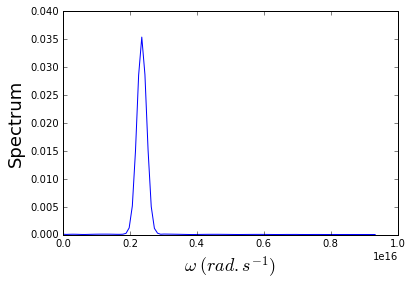

In [18]:
ts_2d.get_spectrum(iteration=200, pol='y', plot=True);

#### Spectrogram
This method does a time-frequency analysis of the laser, by applying the FROG method.

Mathematically:
        $$ s(\omega, \tau) = | \int_{-\infty}^{\infty} E(t) |E(t-\tau)|^2
            \exp( -i\omega t) dt |^2 $$
            
(Additional matplotlib arguments for the plotting option can directly be given with the function, e.g `cmap='coolwarm'`
)

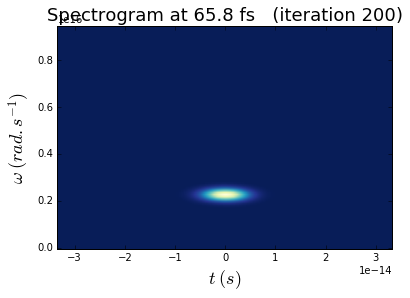

In [24]:
ts_2d.get_spectrogram(iteration=200, pol='y', plot=True, cmap='YlGnBu_r');

#### Main frequency
To calculate the main frequency (i.e. maximum of the spectrum) call:

In [25]:
ts_2d.get_main_frequency(iteration=200, pol='y')

2354564459136066.0

#### Laser $a_0$
A method to calculate the laser strenght a0 as given by $$a0 = E_{max} e / (m_e c \omega)$$

In [26]:
ts_2d.get_a0(iteration=200, pol='y')

1.0072166892532517

#### Laser waist
Calculate the waist of a (gaussian) laser pulse. ( $\sqrt{2} \sigma_r$)


In [27]:
ts_2d.get_laser_waist(iteration=200, pol='y')

4.4482511314410849e-06

#### Pulse length
Calculate the length of a (gaussian) laser pulse. Here 'length' means the 'longitudinal waist' (i.e $\sqrt{2} \sigma_z$).


In [29]:
ts_2d.get_ctau(iteration=200, pol='y')

3.0162979363876806e-06